<a href="https://colab.research.google.com/github/donna6355/study_python/blob/master/ml_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 80.2 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.22.1-py3-none-any.whl size=79578111 sha256=c57c64867c2699e33e3e280eb0a8b716a14ff2b44ee96042b985d2ee7aaa3299
  Stored in directory: /root/.cache/pip/wheels/c0/5a/4b/a1abeb73f3d31c5d010d4163bc08686d5539766084ecba0e1a
Successfully built kiwipiepy_model


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

# # 코랩 konlpy 실행
# !curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

# # Mecab 설치 후 Google Drive에 복사
# !cp -r /usr/local/lib/mecab /content/drive/MyDrive/mecab
# !cp -r /usr/local/etc/mecabrc /content/drive/MyDrive/mecab

import pandas as pd
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords
from konlpy.tag import Okt

kiwi = Kiwi()
okt = Okt()

stopwords = Stopwords()
sw = [i[0] for i in stopwords.stopwords]

df = pd.read_csv('data/kor_crawling.csv', encoding = "utf-8-sig")
df["Review"] = df["Review"].apply(lambda x : x.lower())

df["length"] = df["Review"].apply(lambda x : len(x))
df = df.drop(df[df["length"] < 12].index).reset_index(drop = True)
del df["length"]

# df["token"] = df["Review"].apply(lambda x : [i[0] for i in kiwi.tokenize(x, stopwords = stopwords)])
df["token"] = df["Review"].apply(lambda x : okt.morphs(x, stem = True, norm = True))

cleaned_token = []
for i in df["token"]:
  imsi = [ w for w in i if w not in sw]
  cleaned_token.append(imsi)
df["token"] = cleaned_token


In [6]:
df

,Date,Name,Score,Review,like,token
0,2020년 1월 24일,홍현주,3,시스템에어컨 5대 연결해서 원격제어로 사용중입니다. 에어컨 기능은 공기청정기능까지 ...,2,"[시스템, 에어컨, 5, 대다, 연결하다, 격, 제어, 사용, 이다, ., 에어컨,..."
1,2020년 1월 7일,쌤쌤,3,인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야...,0,"[인덕션, 제어, 용, 사용, 하다, 하다, 끄다, 전용, 인, 건, 좋다, 격, ..."
2,2020년 1월 8일,Nicholas Jun,1,위례 사는 신혼 부부입니다. tv랑 공기청정기는 잘 연동시켰습니다. 오래 걸리지도 ...,0,"[위례, 살다, 신혼, 부부, 이다, ., tv, 랑, 공기청정기, 자다, 연동, ..."
3,2020년 1월 24일,Hong KIM,1,세탁기 된다고 해서 연결했는데 놀라울 정도로 세상 쓰레기에요. 연결은 번거롭고 사용...,0,"[세탁기, 되다, 하다, 연결하다, 놀라다, 정도, 세상, 쓰레기, 에요, ., 연..."
4,2020년 1월 22일,byung-hyun cho,3,건조완료후 에어리플레쉬를 원격으로도 추가할 수 있도록 건조완료후 원격제어를 off하...,0,"[건조, 완료, 후, 에어, 리플, 레쉬, 원격, 으로도, 추가, 하다, 있다, 건..."
...,...,...,...,...,...,...
3882,2017년 8월 1일,Han-Seung Jeon,1,어플이 더위먹었나? 잘되다가 안되네...,0,"[어플, 더위, 먹다, ?, 잘, 되다, 안되다, ...]"
3883,2018년 7월 13일,KoonSeok Lee,5,센서를 너무 잘 쓰고 있어요,0,"[센서, 너무, 자다, 쓰다, 있다]"
3884,2017년 9월 24일,Google 사용자,5,짱!! 밖에 나가도 되니까 진짜 좋아요!,0,"[짱, !!, 밖에, 나가다, 되다, 진짜, 좋다, !]"
3885,2017년 1월 10일,Google 사용자,5,제가 이거 다운받았는데 돼요!!!^^이 앱 만드신 제작자님!힘네세요!!!,0,"[거, 다운, 받다, 돼다, !!!^^, 앱, 만들다, 제작자, 님, !, 힘, 네..."


In [8]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 31.5 MB/s eta 0:00:00


In [9]:
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [10]:
w2v_model = Word2Vec(df['token'],sg = True,window=5, min_count=3, vector_size=100 )

In [12]:
w2v_model.wv.most_similar('세탁기')

[('건조기', 0.9830811619758606),
 ('미니', 0.9366462230682373),
 ('랑', 0.9342847466468811),
 ('워시', 0.9082393050193787),
 ('돌리다', 0.9029299020767212),
 ('/', 0.8980386853218079),
 ('김치냉장고', 0.8922871947288513),
 ('공기청정기', 0.8883811831474304),
 ('티비', 0.8865392804145813),
 ('전', 0.8817827105522156)]

In [14]:
w2v_model.wv.get_vector('제습기')

array([-1.01505384e-01,  1.50519654e-01,  2.51036026e-02,  1.19919725e-01,
        1.39026135e-01, -2.88430035e-01, -1.98853813e-04,  4.15588260e-01,
       -9.48142707e-02, -7.51183182e-02, -1.48005827e-04, -4.37689871e-01,
       -8.50779936e-02,  8.34806040e-02,  8.61093253e-02, -3.04346412e-01,
        3.65587417e-03, -1.39329776e-01, -1.38412282e-01, -1.98134735e-01,
       -6.12972118e-02,  1.05412245e-01,  9.92172882e-02, -6.68513309e-03,
       -4.53979746e-02, -9.63539854e-02, -1.56439781e-01,  2.46092211e-02,
       -2.31709644e-01, -7.02238688e-03,  3.48695591e-02, -2.05830127e-01,
        7.65180290e-02, -7.96760693e-02, -1.08551122e-01, -4.18983363e-02,
       -7.83573091e-02, -2.61192113e-01,  5.86245023e-02, -1.17750436e-01,
       -1.76799685e-01, -3.01288545e-01, -3.02425735e-02, -2.84215286e-02,
        7.98160583e-02, -4.29648980e-02, -2.67942101e-01, -6.77883178e-02,
        9.97750387e-02,  2.49124244e-02,  4.53658076e-03, -1.28516763e-01,
        1.89278081e-01, -

In [15]:
tagged_corpus_list = []
for index, row in df.iterrows():
  text = row['token']
  tag = f'document {index}'
  tagged_corpus_list.append(TaggedDocument(tags = [tag], words = text))
len(tagged_corpus_list)

3887

In [16]:
tagged_corpus_list[0]

TaggedDocument(words=['시스템', '에어컨', '5', '대다', '연결하다', '격', '제어', '사용', '이다', '.', '에어컨', '기능', '공기청정기', '능', '있다', '앱', '에서의', '모드', '공', '청정', '모드', '없다', '.', '냉방', ',', '습', ',', '송풍', ',', '난방', ',', '자동', '있다', '공', '청정', '없다', '.', '리모컨', '공', '청정', '누르다', '앱', '에서는', '송풍', '이던', '데', '앱', '송풍', '선택', '하다', '공', '청정', '되다', '않다', '하다', '.', '리모컨', '송풍', '공', '청정', '같이', '킬수', '있다', '.', '원격', '에서도', '송풍', '공기', '청정', ',', '에어컨', '공기', '청정', ',', '난방', '공', '청정', '같이', '사용', '하다', '하다', '어떻다', '하다', '?'], tags=['document 0'])

In [17]:
d2v_model = doc2vec.Doc2Vec(vector_size=100, dm=True)
d2v_model.build_vocab(tagged_corpus_list)
d2v_model.train(tagged_corpus_list,total_examples=d2v_model.corpus_count,epochs = 10)

In [19]:
d2v_model.dv.get_vector('document 0', norm=True) # sentece vector

array([-1.25506192e-01,  3.73055227e-02, -3.52260331e-03,  6.35117069e-02,
        1.24099500e-01, -1.20203421e-01, -4.08572182e-02,  1.88214645e-01,
       -1.08483084e-01, -2.93239765e-02, -2.56658178e-02, -2.60855317e-01,
       -8.38742927e-02,  8.22160915e-02,  8.12411681e-02, -2.36980021e-01,
        1.02784768e-01,  1.42448200e-02, -1.34483978e-01, -5.84013388e-02,
       -3.56633514e-02, -1.58401821e-02, -2.38208304e-04, -2.29501650e-02,
       -7.46914046e-03, -2.50767507e-02, -1.07733794e-01,  8.93426035e-03,
       -9.75723341e-02, -1.23561613e-01,  1.91472005e-02, -3.24122831e-02,
       -8.46237019e-02, -1.78498682e-02,  7.79118668e-03, -4.76605445e-02,
        9.69911925e-03, -2.56786406e-01,  6.44371286e-02, -9.06677395e-02,
        3.72125488e-03, -1.34641662e-01,  3.30810249e-02, -1.86906621e-01,
        2.27803886e-02, -5.95375374e-02, -1.52517617e-01, -4.93087694e-02,
        5.39931767e-02,  1.04960771e-02, -1.29607581e-02, -2.00830624e-01,
        1.18196942e-01, -

In [20]:
d2v_model.wv.get_vector('냉장고') #word vector

array([-0.18488751,  0.20763747,  0.08411351, -0.02674116,  0.11355942,
       -0.33317456, -0.00781432,  0.40895137, -0.24192198,  0.10567894,
        0.03082521, -0.9067129 , -0.15822889,  0.06406547,  0.13158016,
       -0.46897212,  0.01348009, -0.08671626, -0.44696575, -0.02792542,
       -0.16288395,  0.09380008,  0.08838736,  0.12476978, -0.33222586,
        0.02429869,  0.0853312 ,  0.27003416, -0.26187044, -0.09607875,
        0.06978145, -0.4735522 ,  0.05242544, -0.01470889, -0.16272143,
       -0.21461838,  0.07938304, -0.4817946 ,  0.28815937, -0.10811306,
        0.06556533, -0.55239666, -0.06678823, -0.14349486, -0.00633481,
        0.12918548, -0.19081514, -0.20947433, -0.03400397,  0.04446071,
       -0.04828375, -0.6197901 ,  0.47875792, -0.24694265, -0.31506643,
        0.5182806 ,  0.51458764, -0.09022264, -0.14594838, -0.17476635,
        0.12421112, -0.30054379,  0.1003958 , -0.11918747, -0.17137147,
        0.46873963,  0.02637355,  0.7391809 , -0.51739794,  0.16

In [21]:
d2v_model.wv.most_similar('냉장고')

[('공기청정기', 0.9810875058174133),
 ('정수기', 0.9549269676208496),
 (',', 0.9493582844734192),
 ('랑', 0.9433417320251465),
 ('김치냉장고', 0.9276418089866638),
 ('미니', 0.9202049970626831),
 ('세탁기', 0.9154768586158752),
 ('워시', 0.9088894724845886),
 ('인데', 0.9062010645866394),
 ('건조기', 0.8876814246177673)]

In [25]:
d2v_model.dv.most_similar('document 1')

[('document 735', 0.944473385810852),
 ('document 74', 0.9285328388214111),
 ('document 266', 0.9051707983016968),
 ('document 19', 0.900540292263031),
 ('document 208', 0.8951526880264282),
 ('document 3338', 0.8574094176292419),
 ('document 1047', 0.8570567965507507),
 ('document 738', 0.8501474857330322),
 ('document 71', 0.8467218279838562),
 ('document 130', 0.8368580937385559)]

In [26]:
df['Review'].loc[1]

'인덕션 제어용으로 사용하려고 하는데 끄는 전용인건 좋은데 원격제어기능이 계속 꺼져야하는 이유가 궁금합니다. 전원 켜서 원격제어 눌러놓으면 전원 꺼지기 전까지는 원격제어가 유지되면 좋겠습니다. 혹시나 켜져있을 경우 밖에서 제어해야하는데 원격제어가능이 꺼져있으면 끌 수 없으니 위함할 것 같습니다.'

In [27]:
df['Review'].loc[74]

'세탁기 전원 직접기기에 켜두고 원격제어까지 설정해야 앱에서 컨트롤 가능해서 불편합니다 앱에서 전원까지 조절이 되야 외출시에도 세탁을 시작할수 있는거죠'

In [28]:
df['Review'].loc[19]

'편리하게 잘사용중입니다~ 다만 아쉬운게 세탁기 전원은 직접 켜야한다는점? 그리고 키고나서도 원격모드를 설정해야 한다는 점이 아쉬워요 ㅎ 집밖에서도 전원을 켜고 원격제어를 바로 할 수 있는 날이 오겠죠~~?'

In [29]:
df['Review'].loc[208]

'스마트 씽크 tv는 이앱에서는 전원 제어랑 채널변경도 안되고, 밖에서는 공기청정기 제어 작동 되서 좋은데 tv는 왜 제어가 안되고 연결 끊겼다고 하는지.. 이래서야 tv씽큐 인공지능이면 뭘하고 이 앱으로 도대체 뭘어쩌라는지 모르겠어요..개선이 필요'

In [35]:
#Contextuaized Representation
#BERT
#토큰이 아니라 문장 그대로를 가지고 분석
import torch
from transformers import BertTokenizer, BertModel

def get_bert_embeddings(sentence, tokenizer, model):
    tokens = tokenizer(sentence, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    normalized_embeddings = embeddings / np.linalg.norm(embeddings)
    return normalized_embeddings

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [37]:
import numpy as np
get_bert_embeddings(df['Review'][0],tokenizer,model)

array([-2.20698789e-02, -5.80251869e-03,  1.03381937e-02, -3.94107476e-02,
       -5.05386032e-02, -2.51803920e-03,  4.81613614e-02,  1.58342961e-02,
       -1.70702040e-02, -4.18788791e-02,  4.53629950e-03, -8.68411455e-03,
       -4.87663187e-02, -2.11514160e-02, -3.63070960e-03, -5.78063121e-03,
        1.43143032e-02, -4.02064325e-04,  4.44359332e-02,  2.28525717e-02,
       -4.11174931e-02, -4.65861900e-04,  2.07787808e-02, -2.61459257e-02,
        3.90979424e-02, -1.22155836e-02, -2.38120463e-02, -1.55126370e-04,
        3.28935273e-02, -6.37772633e-03,  5.15552470e-03,  1.49270799e-02,
       -1.97007488e-02, -7.22211413e-03,  3.57374735e-02, -3.47017450e-03,
        1.50637468e-02,  5.29456045e-03,  2.01463383e-02,  3.42354961e-02,
       -3.27184275e-02,  2.86053009e-02,  1.50953988e-02, -5.26721007e-04,
        2.83112004e-02, -1.43375089e-02, -2.21165746e-01,  3.41782160e-02,
       -4.25275974e-02, -4.88551483e-02,  2.01684367e-02,  3.79142910e-03,
       -3.12519483e-02,  

In [40]:
from tqdm import tqdm
brt = [get_bert_embeddings(i,tokenizer,model) for i in tqdm(df['Review'][:100])]

100%|██████████| 100/100 [01:51<00:00,  1.12s/it]


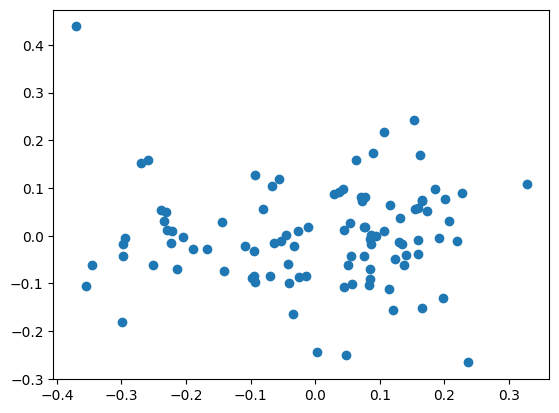

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principal_components = pd.DataFrame(pca.fit_transform(brt),columns = ['principal component1','principal component2'])
plt.scatter(principal_components['principal component1'],principal_components['principal component2'])

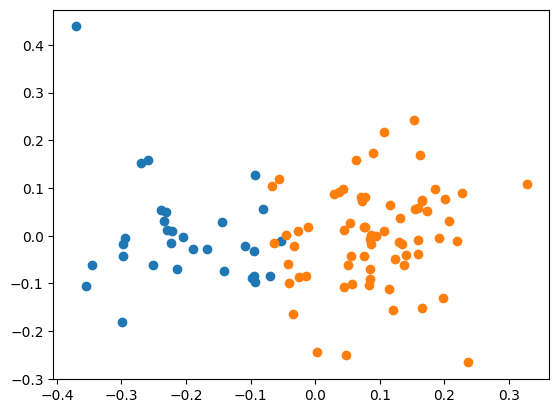

In [45]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(brt)

pca = PCA(n_components = 2)
principal_components = pd.DataFrame(pca.fit_transform(brt),columns = ['principal component1','principal component2'])
principal_components['cluster'] = clusters

color = ['red','green']
for i in range(2):
  temp = principal_components[principal_components['cluster'] == i]
  plt.scatter(temp['principal component1'],temp['principal component2'])

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# 독립변수 brt ** BERT 차원의 갯수는 756개
# 종속변수 score
#독립변수를 보고 종속변수를 예측하는, 리뷰를 보고 별점을 예측하는
x = brt
y = df['Score'].loc[:99]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [49]:
jido_model = RandomForestRegressor(n_estimators=100, max_depth=10)
jido_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10)

In [50]:
jido_model.score(x_test, y_test)

0.17253799890650634